In [81]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f = open("1509878794804.log")

In [4]:
lines = f.readlines()

In [5]:
lines

['size,number_of_threads,duration\n',
 '3,1,0\n',
 '3,3,0\n',
 '3,5,0\n',
 '3,10,0\n',
 '3,25,0\n',
 '3,50,0\n',
 '3,100,0\n',
 '10,1,0\n',
 '10,3,0\n',
 '10,5,0\n',
 '10,10,0\n',
 '10,25,0\n',
 '10,50,0\n',
 '10,100,0\n',
 '50,1,0\n',
 '50,3,0\n',
 '50,5,0\n',
 '50,10,0\n',
 '50,25,0\n',
 '50,50,1\n',
 '50,100,1\n',
 '100,1,1\n',
 '100,3,0\n',
 '100,5,0\n',
 '100,10,0\n',
 '100,25,1\n',
 '100,50,2\n',
 '100,100,5\n',
 '250,1,12\n',
 '250,3,5\n',
 '250,5,11\n',
 '250,10,8\n',
 '250,25,9\n',
 '250,50,14\n',
 '250,100,18\n',
 '500,1,81\n',
 '500,3,52\n',
 '500,5,57\n',
 '500,10,58\n',
 '500,25,57\n',
 '500,50,57\n',
 '500,100,59\n',
 '1000,1,1124\n',
 '1000,3,620\n',
 '1000,5,823\n',
 '1000,10,812\n',
 '1000,25,801\n',
 '1000,50,801\n',
 '1000,100,819\n']

In [6]:
lines = lines[1:]

In [7]:
lines = list(map(lambda line: line[:-1].split(','), lines))

In [12]:
lines = list(map(lambda line: [int(line[0]), int(line[1]), int(line[2])], lines))

In [13]:
lines

[[3, 1, 0],
 [3, 3, 0],
 [3, 5, 0],
 [3, 10, 0],
 [3, 25, 0],
 [3, 50, 0],
 [3, 100, 0],
 [10, 1, 0],
 [10, 3, 0],
 [10, 5, 0],
 [10, 10, 0],
 [10, 25, 0],
 [10, 50, 0],
 [10, 100, 0],
 [50, 1, 0],
 [50, 3, 0],
 [50, 5, 0],
 [50, 10, 0],
 [50, 25, 0],
 [50, 50, 1],
 [50, 100, 1],
 [100, 1, 1],
 [100, 3, 0],
 [100, 5, 0],
 [100, 10, 0],
 [100, 25, 1],
 [100, 50, 2],
 [100, 100, 5],
 [250, 1, 12],
 [250, 3, 5],
 [250, 5, 11],
 [250, 10, 8],
 [250, 25, 9],
 [250, 50, 14],
 [250, 100, 18],
 [500, 1, 81],
 [500, 3, 52],
 [500, 5, 57],
 [500, 10, 58],
 [500, 25, 57],
 [500, 50, 57],
 [500, 100, 59],
 [1000, 1, 1124],
 [1000, 3, 620],
 [1000, 5, 823],
 [1000, 10, 812],
 [1000, 25, 801],
 [1000, 50, 801],
 [1000, 100, 819]]

In [16]:
ind = 0
mat = []
for i in range(7):
    current = []
    for j in range(7):
        current.append(lines[ind][2])
        ind += 1
    mat.append(current)
mat

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 1, 2, 5],
 [12, 5, 11, 8, 9, 14, 18],
 [81, 52, 57, 58, 57, 57, 59],
 [1124, 620, 823, 812, 801, 801, 819]]

In [91]:
plt.imshow(mat, interpolation='nearest')
plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'

In [139]:
import matplotlib.patches as mpatches
def plot_statistics_from_csv(filename):
    with open(filename) as f:
        lines = f.readlines()
        lines = list(map(lambda line: line[:-1].split(','), lines[1:]))
        lines = list(map(lambda line: [int(line[0]), int(line[1]), int(line[2])], lines))
        ind = 0
        mat = []
        for i in range(7):
            current = []
            for j in range(7):
                current.append(lines[ind][2])
                ind += 1
            mat.append(current)
        print(mat)
        plt.clf()
        im = plt.imshow(mat, cmap='binary', interpolation='nearest')
        plt.xticks(range(7), sorted(list(set(list(map(lambda line: line[1], lines))))))
        plt.yticks(range(7), sorted(list(set(list(map(lambda line: line[0], lines))))))
        values = list(map (lambda line: line[2], lines))
        colors = [ im.cmap(im.norm(value)) for value in values]
        # create a patch (proxy artist) for every color 
        patches = [ mpatches.Patch(color=colors[i], label="ns {l}".format(l=values[i]) ) for i in range(len(values)) ]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
        plt.show()

[[310, 191, 152, 174, 143, 123, 118], [96, 171, 248, 444, 371, 353, 360], [310, 307, 268, 399, 885, 1773, 1607], [989, 671, 730, 847, 1290, 2170, 4564], [8681, 5646, 7750, 7008, 6738, 8098, 11695], [87414, 52381, 47465, 47775, 59178, 45454, 47252], [1435601, 672478, 785246, 795108, 789840, 792192, 788166]]


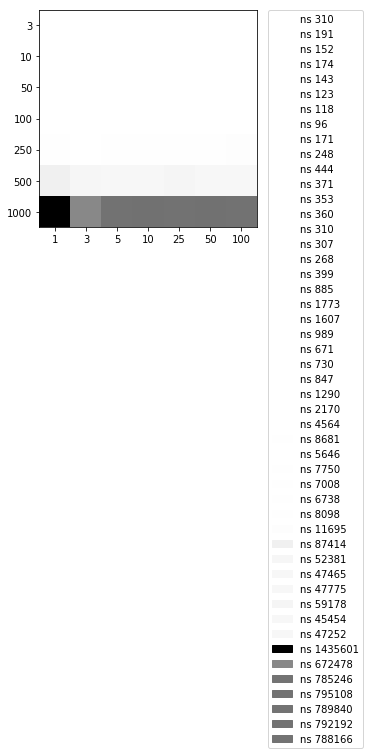

In [140]:
plot_statistics_from_csv("1509880672754.log")

[[71112, 22392, 13393, 1917, 1425, 2655, 3823], [8775, 7261, 6211, 7332, 6167, 7531, 11860], [123746, 75348, 88483, 95175, 81672, 84639, 91688], [602802, 427126, 608755, 586458, 586228, 563960, 570691], [2045137, 1471601, 1994662, 2027629, 2006647, 1939754, 1919892], [15622871, 8572966, 9514785, 9467847, 9347070, 9322910, 8948304], [49937445, 28647387, 25188369, 24339101, 24123918, 23864170, 23498409]]


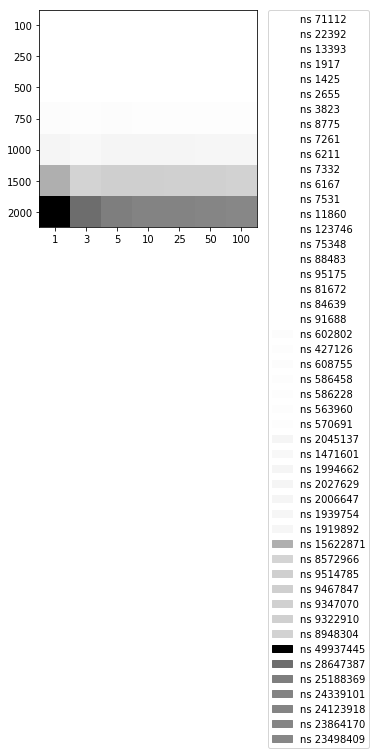

In [141]:
plot_statistics_from_csv("1509901419084.log")